<a href="https://colab.research.google.com/github/vikasgrg/Analytics/blob/main/VG_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [79]:
url = "https://raw.githubusercontent.com/vikasgrg/KagleDS/refs/heads/main/Student_Marks.csv"
df = pd.read_csv(url)
df.head()
# df.columns = df.columns.str.strip().str.replace('\ufeff','').str.lower()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [74]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [81]:
median_time_study = df['time_study'].median()
# median_time_study

df['time_study'] = df['time_study'].fillna(median_time_study)
# df.info()
df
# df = df.dropna()
# df.info()
# df.shape

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


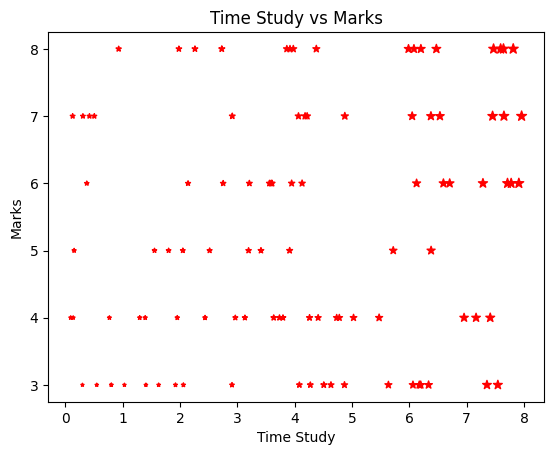

In [94]:
plt.scatter(df['time_study'], df['number_courses'] , df['Marks'], color='Red', marker='*')
plt.xlabel('Time Study')
plt.ylabel('Marks')
plt.title('Time Study vs Marks')
plt.show()

In [95]:
reg = LinearRegression()
reg.fit(df[['time_study', 'number_courses']], df.Marks)

LinearRegression()

In [112]:
reg.predict(df[['time_study', 'number_courses']])

array([22.47530397,  0.5181779 , 16.91548388, 46.43006326, 49.62904522,
       21.06472131, 30.87102699, 20.29130468, 23.81023519, 31.46493665,
       37.83596762,  7.8758616 , 28.36574509, 21.21189613, 13.83661791,
       23.00035837, 32.74181097, 40.28306674, 45.36102586, 28.92859375,
       25.55416994, 36.80332748, 12.93762318, 31.91300556, 19.62587163,
        5.73245055,  8.33479179, 31.09366444,  2.70617937,  7.01338999,
       28.31848655,  8.51842681, 12.48809434, 39.33014315, 20.18065299,
       38.86181159, 16.01382102, 43.05017733, 40.86484399, 45.7065733 ,
        0.75574177, 18.59729661, 23.11640925, 10.27042886, 10.54985209,
        9.26351348, 20.5005386 , 25.80253217, 28.56017846, 22.99089408,
       39.91865364, 26.02656662,  4.16262359, 38.25164145, 48.44122589,
       21.31981678, 48.71118483, 46.89032751, 31.59991612, 47.7771269 ,
        5.75804945, 13.16305462, 23.19739693, 24.42440751,  6.29390221,
       15.29299919, 29.54956224,  1.10535433,  7.53171115, 25.04

In [97]:
reg.coef_

array([5.39917879, 1.86405074])

In [98]:
reg.intercept_

np.float64(-7.456346231178362)

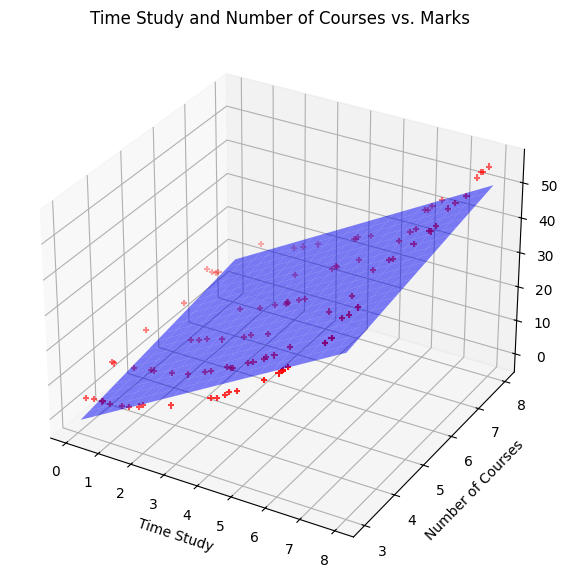

In [108]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['time_study'], df['number_courses'], df['Marks'], color='red', marker='+', label='Data points')

# Create a meshgrid for the regression plane
x1_range = np.linspace(min(df['time_study']), max(df['time_study']), 20)
x2_range = np.linspace(min(df['number_courses']), max(df['number_courses']), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_mesh = reg.coef_[0] * x1_mesh + reg.coef_[1] * x2_mesh + reg.intercept_

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, color='blue', alpha=0.5, label='Regression Plane')

# Labels
ax.set_xlabel('Time Study')
ax.set_ylabel('Number of Courses')
ax.set_zlabel('Marks')
ax.set_title('Time Study and Number of Courses vs. Marks')

plt.show()